# 1. SISMOLOGIA

## 1.1. Fundamentos

Los sismos, también conocidos como terremotos, son eventos sísmicos que liberan energía en forma de ondas que viajan a través de la Tierra. Esta energía proviene del movimiento de las placas tectónicas, las grandes masas de roca que forman la corteza terrestre.

### 1.1.1. Como se Producen los Sismos

Las placas tectónicas se encuentran en constante movimiento, deslizándose unas sobre otras. Cuando las placas se atascan y acumulan tensión, esta tensión finalmente se libera de forma abrupta, provocando el movimiento repentino de las placas. Este movimiento genera ondas sísmicas que se transmiten por la Tierra, causando vibraciones en la superficie y produciendo los efectos que conocemos como un sismo.

### 1.1.2. Los Tipos de Ondas Sísmicas

Existen diferentes tipos de ondas sísmicas que se generan durante un sismo. Las **ondas P** son las primeras en llegar a la superficie y son las que causan la compresión y descompresión del suelo. Las **ondas S** son más lentas que las ondas P y causan el movimiento de lado a lado del suelo. Las **ondas L** son las más lentas y las que producen el movimiento ondulatorio de la superficie

### 1.1.3. Magnitud e Intensidad

La magnitud de un sismo se mide en la escala de Richter, una escala logarítmica que representa la cantidad de energía liberada por el evento. La intensidad de un sismo, por otro lado, se refiere a la fuerza con la que se siente el temblor en un lugar determinado y se mide en la escala de Mercalli.

## 1.2. Dataset

Los datos de estudio fueron adquiridos de la paltaforma Kaggle, en la cual la The National Earthquake Information Center (NEIC) determina la localizacion y tamaño de todos los simosmos significantes al rededor del mundo. 



In [1]:
# Importacion de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importación de datos

df = pd.read_excel('D:\\SynologyDrive\\Estudio\\Diplomado\\Proyecto Final Diplomado\\Datasets\\Sismos_global+.xlsx')


## 1.3. Descripcion Preliminar de los Datos

In [3]:
#Tamaño
df.shape

(23412, 8)

In [4]:
#Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               23412 non-null  int64  
 1   Latitud          23412 non-null  float64
 2   Longitud         23412 non-null  float64
 3   Magnitud         23412 non-null  float64
 4   Profundidad      23412 non-null  float64
 5   Placa            23412 non-null  object 
 6   T_Falla          23412 non-null  object 
 7   Distancia_Falla  23412 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [5]:
#Vista Preliminar
df.head()

,ID,Latitud,Longitud,Magnitud,Profundidad,Placa,T_Falla,Distancia_Falla
0,1,19.246,145.616,6.0,131.6,Placa Filipina,TRENCH,129469
1,2,1.863,127.352,5.8,80.0,Placa Indo-China,TRENCH,68333
2,3,-20.579,-173.972,6.2,20.0,Placa del Pacifico,TRENCH,678719
3,4,-59.076,-23.557,5.8,15.0,Placa Sudamericana,TRENCH,32355
4,5,11.938,126.427,5.8,15.0,Placa Filipina,TRENCH,24123


In [6]:
#Resumen estadistico preliminar

df.describe()


,ID,Latitud,Longitud,Magnitud,Profundidad,Distancia_Falla
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,2.341200e+04
mean,11706.500000,1.679033,39.639961,5.882531,70.767911,2.483560e+05
std,6758.606587,30.113183,125.511959,0.423066,122.651898,4.252850e+05
min,1.000000,-77.080000,-179.997000,5.500000,-1.100000,4.000000e+00
25%,5853.750000,-18.653000,-76.349750,5.600000,14.522500,4.171600e+04
50%,11706.500000,-3.568500,103.982000,5.700000,33.000000,9.790300e+04
75%,17559.250000,26.190750,145.026250,6.000000,54.000000,2.158692e+05
max,23412.000000,86.005000,179.998000,9.100000,700.000000,3.595006e+06


## 1.3. Tipos de Datos

In [7]:
df.dtypes

ID                   int64
Latitud            float64
Longitud           float64
Magnitud           float64
Profundidad        float64
Placa               object
T_Falla             object
Distancia_Falla      int64
dtype: object

## 1.4. Datos Faltantes

In [8]:
# Datos nulos
df.isnull()

,ID,Latitud,Longitud,Magnitud,Profundidad,Placa,T_Falla,Distancia_Falla
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
23407,False,False,False,False,False,False,False,False
23408,False,False,False,False,False,False,False,False
23409,False,False,False,False,False,False,False,False
23410,False,False,False,False,False,False,False,False


In [9]:
# Porcentaje de datos faltantes
missing_percent = df.isna().sum() / len(df) * 100
print(missing_percent)

ID                 0.0
Latitud            0.0
Longitud           0.0
Magnitud           0.0
Profundidad        0.0
Placa              0.0
T_Falla            0.0
Distancia_Falla    0.0
dtype: float64


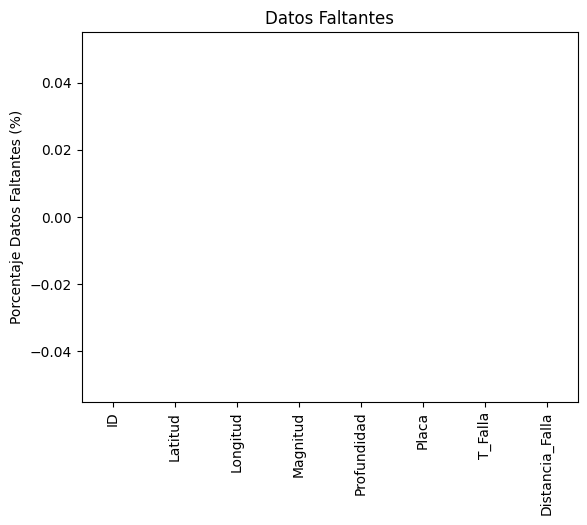

In [10]:
#Graficar porcentajes de datos faltantes por variable
missing_percent.plot(kind='bar')
plt.title('Datos Faltantes')
plt.xlabel('index')
plt.ylabel('0')
plt.xlabel('')
plt.ylabel('Porcentaje Datos Faltantes (%)')
plt.show()

Las variables de la base de datos de sismos significativos que presentan porcentajes altos de datos faltantes están asociadas con valores medios de error durante la captura de los datos.

Esto sugiere que la captura de datos de estas variables puede haber sido menos precisa o más propensa a errores en comparación con otras variables con menor cantidad de datos faltantes. Esta situación puede afectar la calidad y la integridad de los datos, lo que a su vez puede influir en la fiabilidad de los análisis y conclusiones derivados de esta base de datos. 

## 1.5. Variables Representativas

De acuerdo con la descripcion de los datos y datos faltandes del Dataset se establecen las siguiente variables para el analisis.

* Date
* Time
* Latitude
* Longitude
* Type
* Depth





In [11]:
Typefault= {
    'RIDGE':1,
    'TRANSFORM FAULT':2,
    'TRENCH':3
}


Plate = {
    'Placa Antartica':	1,
    'Placa Sudamericana':	2,
    'Placa de Nazca':	3,
    'Placa del Caribe':	4,
    'Placa de Cocos':	5,
    'Placa Norteamericana':	6,
    'Placa del Pacifico':	7,
    'Placa de Ojotsk':	8,
    'Placa de Amur':	9,
    'Placa Filipina':	10,
    'Placa Euroasiatica':	11,
    'Placa Indo-China':	12,
    'Placa Indo-Australian':	13,
    'Placa Arabiga':	14,
    'Placa Somali':	15,
    'Placa Africana':	16,

}



In [12]:
df['FallaID'] = df['T_Falla'].map(Typefault)
df['PlacaID'] = df['Placa'].map(Plate)

In [13]:
#Crear el dataframe con las variables representativas

df2 = df[['Latitud', 'Longitud', 'Magnitud', 'Profundidad', 'Distancia_Falla', 'FallaID', 'PlacaID']]

df2['Distancia_Falla'] = df2['Distancia_Falla']/1000

C:\Users\camil\AppData\Local\Temp\ipykernel_29312\1319345193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Distancia_Falla'] = df2['Distancia_Falla']/1000


In [14]:
df2.drop(df2[df2['Profundidad'] == 0].index, inplace=True)

C:\Users\camil\AppData\Local\Temp\ipykernel_29312\388680672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[df2['Profundidad'] == 0].index, inplace=True)


## 1.8. CORRELACIÓN

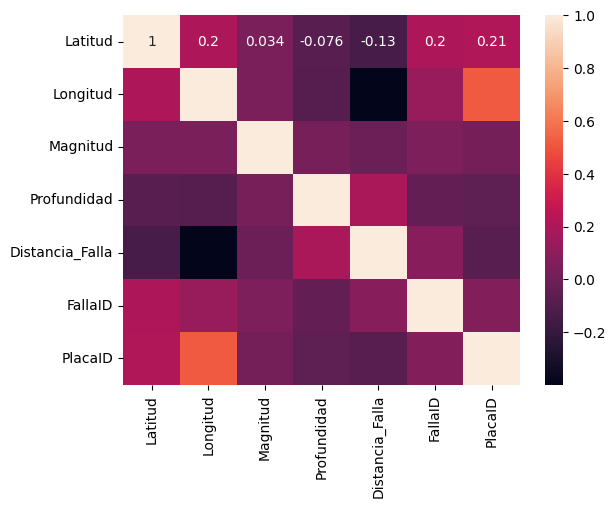

In [15]:
m_corr = df2.corr()
sns.heatmap(m_corr, annot=True)
plt.show()

In [16]:
#sns.set_theme(style="ticks")
#sns.pairplot(df2, hue='FallaID', palette="deep" )

De acuerdo con las graficas y matrices se tiene mayores correlaciones respecto alos datos de magnitud y profundidad pero de las estaciones sismicas, esto evidenci aun proble y es que se tiene datos faltantes de estas variables.

In [17]:
df3 = df2[(df2['Profundidad'] >= 80) & (df2['Profundidad'] <= 300) & (df2['Distancia_Falla'] <= 500)]



In [18]:
#sns.set_theme(style="ticks")
#sns.pairplot(df3,  hue='FallaID', palette="deep")

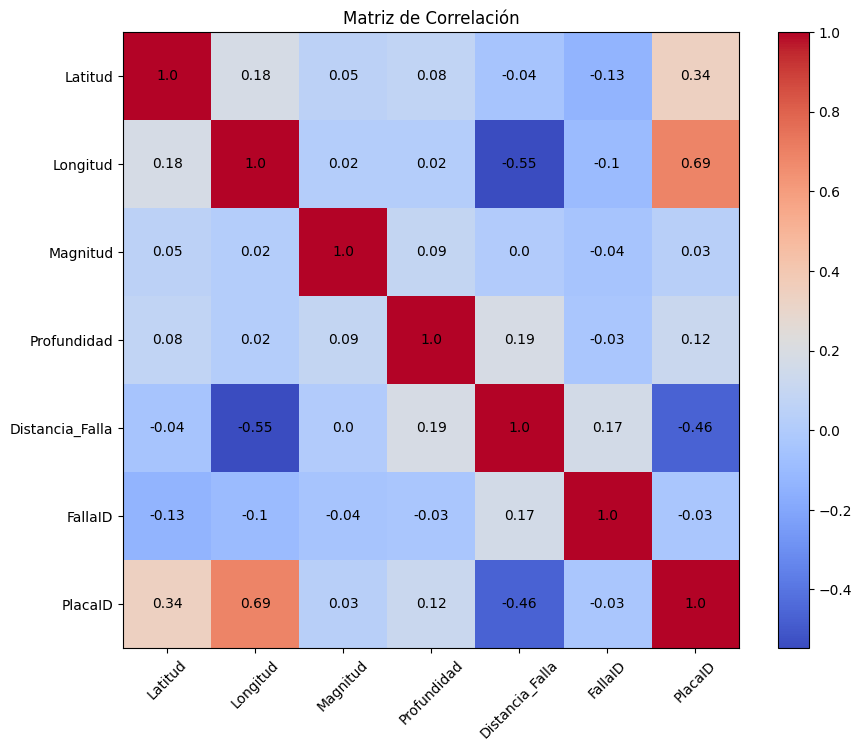

In [19]:

correlation_matrix = df3.corr()

plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

# Etiquetas de los ejes
tick_marks = range(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=45)
plt.yticks(tick_marks, correlation_matrix.columns)

# Mostrar valores numéricos en las celdas
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                 ha="center", va="center", color="black")

plt.title("Matriz de Correlación")
plt.show()

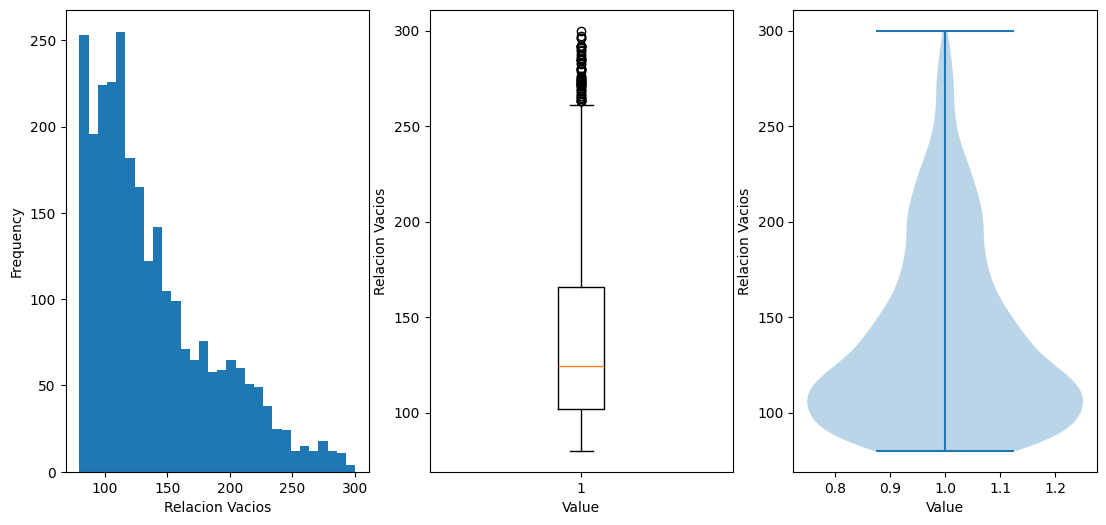

In [20]:
#-------Pu--------

e = df3['Profundidad']


plt.figure(figsize=(18, 6))

plt.subplot(1,4,1)
plt.hist(e, bins=30)
plt.xlabel('Relacion Vacios')
plt.ylabel('Frequency')

plt.subplot(1,4,2)
plt.boxplot(e)
plt.xlabel('Value')
plt.ylabel('Relacion Vacios')

plt.subplot(1,4,3)
plt.violinplot(e)
plt.xlabel('Value')
plt.ylabel('Relacion Vacios')

plt.show()

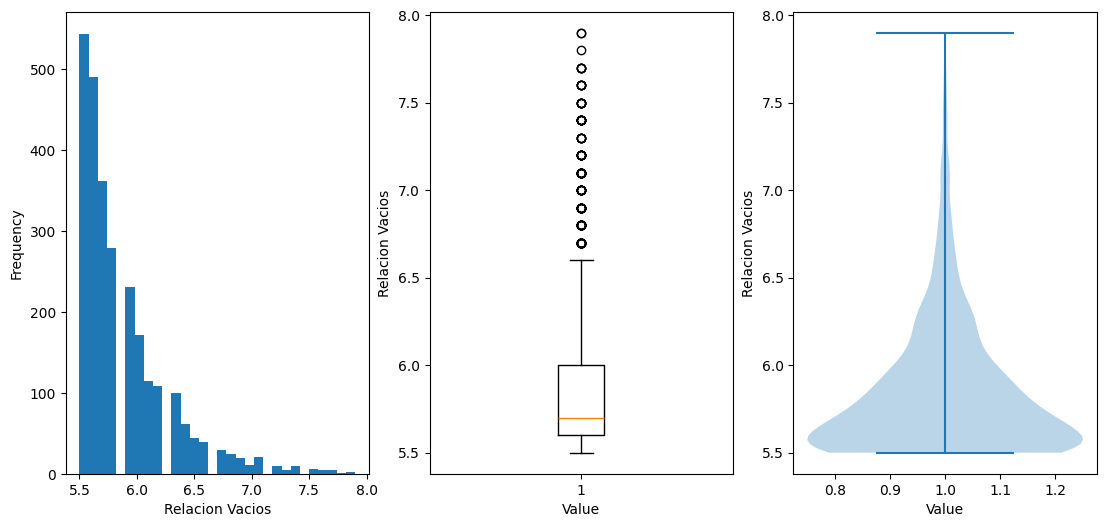

In [21]:
#-------Pu--------

e = df3['Magnitud']


plt.figure(figsize=(18, 6))

plt.subplot(1,4,1)
plt.hist(e, bins=30)
plt.xlabel('Relacion Vacios')
plt.ylabel('Frequency')

plt.subplot(1,4,2)
plt.boxplot(e)
plt.xlabel('Value')
plt.ylabel('Relacion Vacios')

plt.subplot(1,4,3)
plt.violinplot(e)
plt.xlabel('Value')
plt.ylabel('Relacion Vacios')

plt.show()

In [22]:
X = df3[['Longitud','Profundidad', 'FallaID', 'PlacaID' ]].to_numpy()

y = df3[['Distancia_Falla']].to_numpy()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, QuantileTransformer, MinMaxScaler
from sklearn.linear_model import Ridge


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [25]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
x1 = pd.DataFrame(X_train)
x1.describe()

,0,1,2,3
count,1804.000000,1804.000000,1804.000000,1804.000000
mean,-0.277255,0.241412,-0.184590,-0.162971
std,0.516075,0.759150,0.483523,0.593011
min,-1.427424,-0.681080,-2.000000,-1.285714
25%,-0.901376,-0.338956,0.000000,-0.571429
50%,0.000000,0.000000,0.000000,0.000000
75%,0.098624,0.661044,0.000000,0.428571
max,0.249464,2.803516,0.000000,0.857143


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


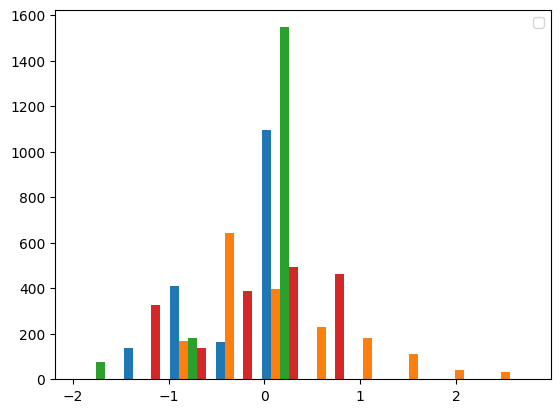

In [27]:
plt.hist(x1)
plt.legend()
plt.show()

Ridge Regresion

In [28]:
ridge = Ridge()
ridge.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_predict = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(mae, mse, r2)


64.1685833958162 7046.283734487424 0.38126649750661556


In [29]:
param_grid = {
    'alpha' :[0.001, 0.01, 0.1, 1.0, 10.0, 20, 30, 40, 50, 100.]
}

from sklearn.model_selection import GridSearchCV

ridge_cv = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1)


ridge_cv.fit(X_train, y_train)


y_predict2 = ridge_cv.predict(X_test)


mae2 = mean_absolute_error(y_test, y_predict2 )
mse2 = mean_squared_error(y_test, y_predict2 )
r22 = r2_score(y_test, y_predict2 )

print(mae2, mse2, r22)

64.1685833958162 7046.283734487424 0.38126649750661556


Neural Network

In [30]:
from sklearn.neural_network import MLPRegressor
MLp = MLPRegressor()

param_grid4 = {
    'hidden_layer_sizes': [(100,), (10,50,10), (20,), (100,100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.05],
    'solver': ['sgd', 'adam']
}



MLp_cv = GridSearchCV(MLp, param_grid4, cv=3)


MLp_cv.fit(X_train, y_train)




c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Pyth

GridSearchCV(cv=3, estimator=MLPRegressor(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (10, 50, 10), (20,),
                                                (100, 100)],
                         'learning_rate_init': [0.001, 0.05],
                         'solver': ['sgd', 'adam']})

In [31]:
y_predict8 = MLp_cv.predict(X_test)
mae8 = mean_absolute_error(y_test, y_predict8)
mse8 = mean_squared_error(y_test, y_predict8)
r28 = r2_score(y_test, y_predict8)

print(mae8, mse8, r28)


53.511625755415 5262.0264581506035 0.5379419587194325


Epsilon-Support Vector Regression

In [32]:
from sklearn.svm import SVR
svr = SVR(degree=3)
param_grid5 = {
    'kernel': ['linear', 'poly'],
    'degree': [2, 3, 4]
}

svr_cv = GridSearchCV(svr, param_grid5, cv=5)

svr_cv.fit(X_train, y_train)

y_predict10 = svr_cv.predict(X_test)
mae10 = mean_absolute_error(y_test, y_predict10)
mse10 = mean_squared_error(y_test, y_predict10)
r210 = r2_score(y_test, y_predict10)

print(mae10, mse10, r210)

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataC

60.19150583712581 6208.644565002356 0.4548195130663626


c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsRegressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

Knr = KNeighborsRegressor()

param_grid6 = {
    'n_neighbors':[2,3,4,5, 6, 7, 8, 9, 10],
    'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45]
               }

Knr_cv = GridSearchCV(Knr, param_grid6, cv=5)


Knr_cv.fit(X_train, y_train)
y_predict12 = Knr_cv.predict(X_test)

mae12 = mean_absolute_error(y_test, y_predict12)
mse12 = mean_squared_error(y_test, y_predict12)
r212 = r2_score(y_test, y_predict12)

print(mae12, mse12, r212)

48.57148235955056 4660.809167274191 0.590734791673754


Random Forest Regresor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=(21))

rfr.fit(X_train, y_train)
y_predict15 = rfr.predict(X_test)

mae15 = mean_absolute_error(y_test, y_predict15)
mse15 = mean_squared_error(y_test, y_predict15)
r215 = r2_score(y_test, y_predict15)

print(mae15, mse15, r215)


c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


56.24849088764045 7720.0122355983285 0.32210646209934257


Gradient Boosting Regresor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

y_predict16 = gbr.predict(X_test)


mae16 = mean_absolute_error(y_test, y_predict16)
mse16 = mean_squared_error(y_test, y_predict16)
r216 = r2_score(y_test, y_predict16)

print(mae16, mse16, r216)

51.22200935822 5944.426858755792 0.478020444644886


c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Stacking

In [42]:
from sklearn.ensemble import StackingRegressor


estimators = [
    
    ('knr',Knr_cv.best_estimator_),
    ('mpl', MLp_cv.best_estimator_),
    
]



sr = StackingRegressor(
    estimators= estimators,
    )


sr.fit(X_train, y_train)


y_predict17 = sr.predict(X_test)

mae17 = mean_absolute_error(y_test, y_predict17)
mse17 = mean_squared_error(y_test, y_predict17)
r217 = r2_score(y_test, y_predict17)

print(mae17, mse17, r217)

c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_stacking.py:967: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum it

48.87559984984056 4619.628956641532 0.5943508220407193


c:\Users\camil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


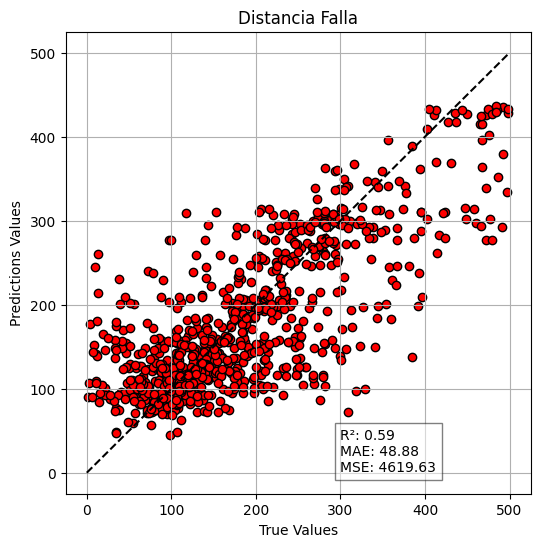

In [43]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_predict17, color='red', edgecolor='black', label='Datos Predichos vs Reales')
plt.plot([0, 500], [0, 500], color='black', linestyle='--', label='Línea de Referencia')
plt.title('Distancia Falla')
plt.xlabel('True Values')
plt.ylabel('Predictions Values')

# Añadir las métricas en una caja de texto
metrics_text = f'R²: {r217:.2f}\nMAE: {mae17:.2f}\nMSE: {mse17:.2f}'
plt.text(300, 1, metrics_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


plt.grid(True)
plt.show()